<a href="https://colab.research.google.com/github/Arshad221b/Handwritten-Digit-Recognition-/blob/master/Digitrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.datasets import mnist 
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [2]:
(train_X, train_Y) , (test_X , test_Y) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255

In [4]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
train_X = train_X.reshape(60000,784)
test_X = test_X.reshape(10000,784)
train_Y = keras.utils.to_categorical(train_Y,10)
test_Y = keras.utils.to_categorical(test_Y,10)

In [6]:
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(train_X,train_Y,batch_size=32,epochs=10,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2724 - acc: 0.9219
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.2640 - acc: 0.9241
Epoch 3/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.2560 - acc: 0.9265
Epoch 4/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.2491 - acc: 0.9286
Epoch 5/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.2424 - acc: 0.9309
Epoch 6/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.2360 - acc: 0.9322
Epoch 7/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.2301 - acc: 0.9339
Epoch 8/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2245 - acc: 0.9358
Epoch 9/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.2192 - acc: 0.9373
Epoch 10/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.2142 - acc: 0.9387

In [10]:
accuracy = model.evaluate(x=test_X,y=test_Y,batch_size=32)
print("Accuracy: ",accuracy[1])

10000/10000 [==============================] - 0s 41us/step
Accuracy:  0.9392


In [15]:
img = test_X[1000]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

Class:  9


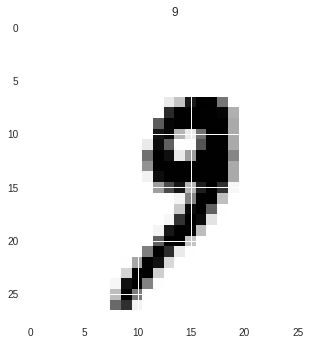

In [23]:
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()